In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
csv=r'C:\Users\Swayam Dutta\Desktop\Sentiment Analysis\clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

,text,target
0,awww that bummer you shoulda got david carr of...,0
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it not behaving at all mad why am here beca...,0


In [3]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
text      1596041 non-null object
target    1600000 non-null int64
dtypes: int64(1), object(1)
memory usage: 36.6+ MB


In [14]:
my_df.isnull().any(axis=0)

text       True
target    False
dtype: bool

In [16]:
np.sum(my_df.isnull().any(axis=1))

3959

In [19]:
df = pd.read_csv(r'C:\Users\Swayam Dutta\Desktop\Sentiment Analysis\trainingandtestdata\training.1600000.processed.noemoticon.csv',header=None,encoding='latin1')

In [20]:
df.iloc[my_df[my_df.isnull().any(axis=1)].index,:].head()

,0,1,2,3,4,5
208,0,1467863072,Mon Apr 06 22:33:25 PDT 2009,NO_QUERY,Artiel87,@mandayyy
249,0,1467874569,Mon Apr 06 22:36:27 PDT 2009,NO_QUERY,Artiel87,@mandayyy
282,0,1467881474,Mon Apr 06 22:38:20 PDT 2009,NO_QUERY,__Susan__,@ITS_NEMESIS -------
398,0,1467912842,Mon Apr 06 22:46:53 PDT 2009,NO_QUERY,KimberlyKane,@danadearmond
430,0,1467919452,Mon Apr 06 22:48:48 PDT 2009,NO_QUERY,jtmal0723,@anistorm


In [21]:
my_df.dropna(inplace=True)

In [26]:
my_df.reset_index(drop=True,inplace=True)

In [28]:
my_df.text[208]

'think want to read some books but the library does not have them'

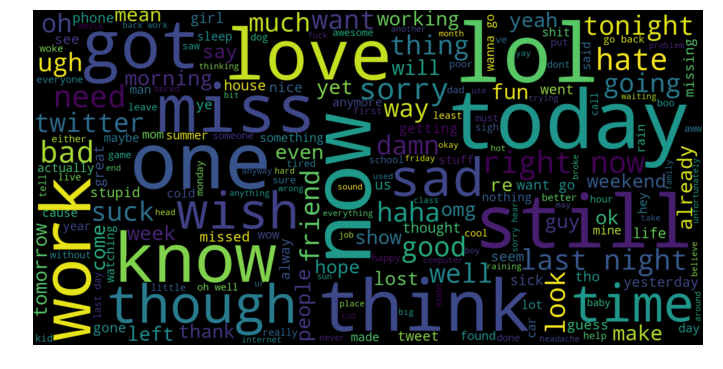

In [29]:
neg_tweets = my_df[my_df.target == 0]
neg_string = []
for t in neg_tweets.text:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [31]:
for t in neg_tweets.text[:200]:
    if 'love' in t:
        print(t)

ahh ive always wanted to see rent love the soundtrack
meh almost lover is the exception this track gets me depressed every time
awe love you too am here miss you
damn the grind is inspirational and saddening at the same time do not want you to stop cuz like what do much love
missing you babe but as long as your alive happy ya tired my love imma try to sleep hopefully you had headstart
love the french tell people here in the south qtr french and they snarl at me french are beautiful people


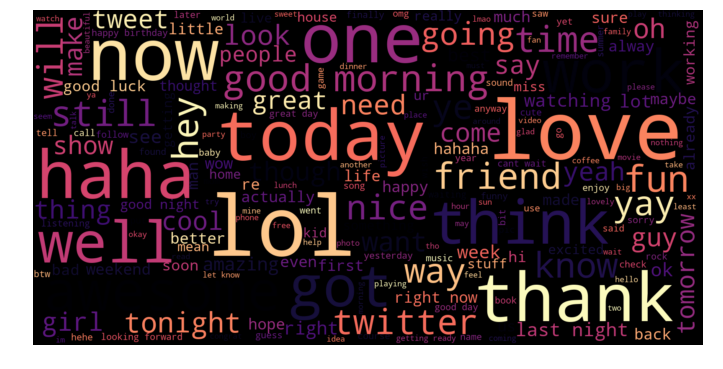

In [32]:
pos_tweets = my_df[my_df.target == 4]
pos_string = []
for t in pos_tweets.text:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='magma').generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off") 
plt.show()

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(my_df.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [34]:
len(cvec.get_feature_names())

264939

In [41]:
neg_doc_matrix = cvec.transform(my_df[my_df.target == 0].text)
pos_doc_matrix = cvec.transform(my_df[my_df.target == 4].text)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()

In [42]:
term_freq_df.head()

,0,1
aa,160,92
aaa,93,54
aaaa,45,29
aaaaa,26,12
aaaaaa,16,12


In [43]:
term_freq_df.columns = ['negative','positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
to,313162,252567,565729
the,257836,265998,523834
my,190775,125955,316730
it,157448,147786,305234
and,153958,149642,303600
you,103844,198245,302089
not,194724,86861,281585
is,133432,111191,244623
in,115542,101160,216702
for,98999,117369,216368


In [44]:
#Visualization of Zipf's law 
y_pos = np.arange(500)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [term_freq_df.sort_values(by='total', ascending=False)['total'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, term_freq_df.sort_values(by='total', ascending=False)['total'][:500], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 500 tokens in tweets')

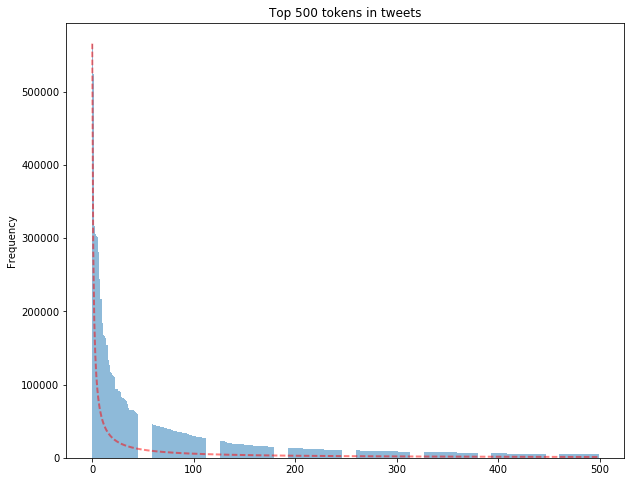

In [45]:
plt.show()

In [46]:
cvec = CountVectorizer()
from sklearn.feature_extraction import text
cvec.set_params(stop_words=text.ENGLISH_STOP_WORDS)
cvec.fit(my_df.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=frozenset({'while', 'besides', 'whereupon', 'one', 'she', 'call', 'from', 'thereupon', 'wherever', 'noone', 'whole', 'became', 'up', 'were', 'fifteen', 'top', 'hereby', 'system', 'ever', 'third', 'nothing', 'empty', 'therein', 'amount', 'those', 'etc', 'move', 'much', 'sometimes', 'twenty...n', 'hence', 'part', 'until', 'seeming', 'with', 'mine', 'since', 'than', 'elsewhere', 'hereafter'}),
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [47]:
len(cvec.get_feature_names())

264628

In [48]:
neg_doc_matrix = cvec.transform(my_df[my_df.target == 0].text)
pos_doc_matrix = cvec.transform(my_df[my_df.target == 4].text)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()

In [49]:
term_freq_df.columns = ['negative','positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
just,64004,62944,126948
good,29209,62118,91327
day,41374,48186,89560
like,41050,37520,78570
today,38116,30100,68216
work,45420,19529,64949
love,16990,47694,64684
going,33689,30939,64628
got,33408,28037,61445
lol,23123,36118,59241


In [51]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative tweets')

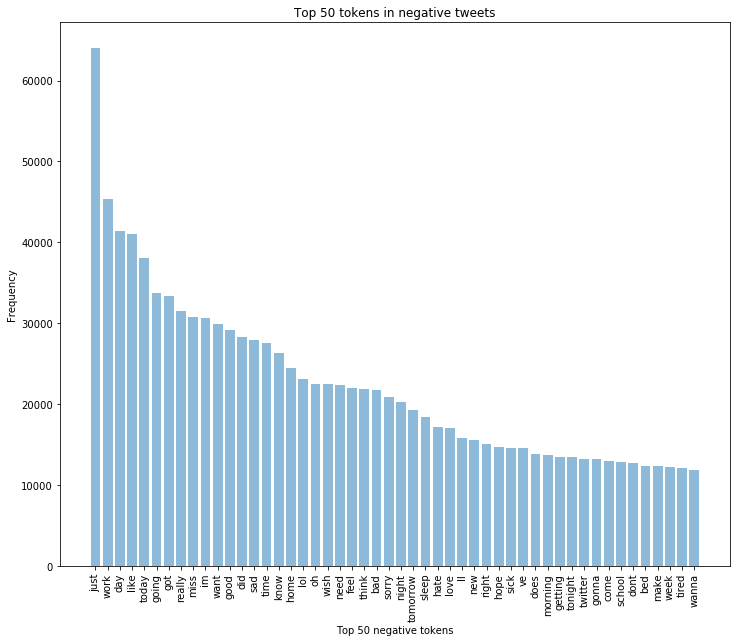

In [52]:
plt.show()

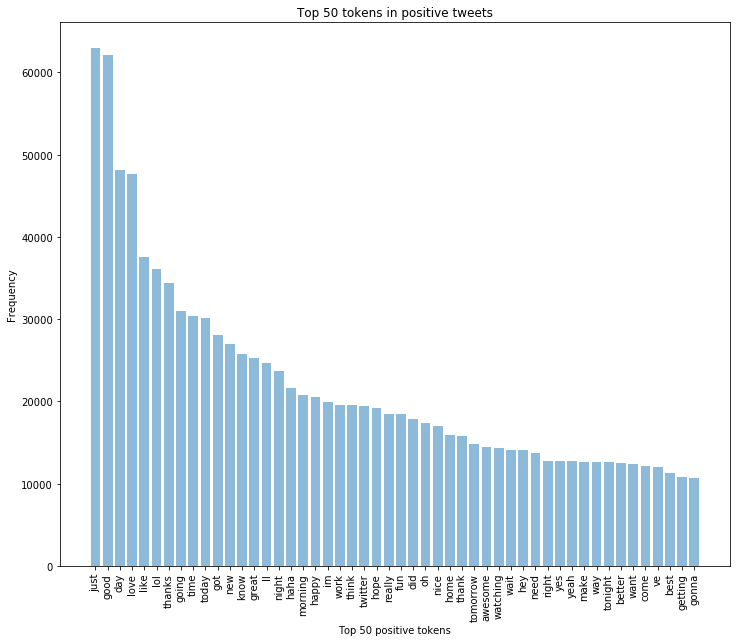

In [53]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 positive tokens')
plt.title('Top 50 tokens in positive tweets')
plt.show()

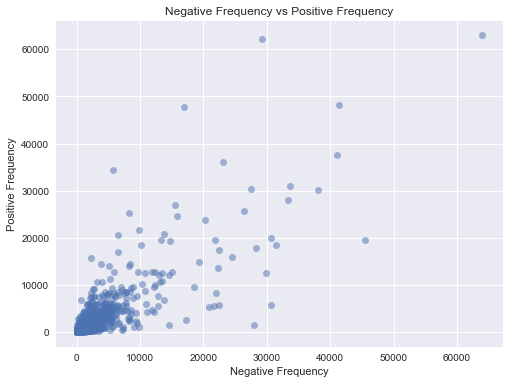

In [54]:
import seaborn as sns
plt.figure(figsize=(8,6))
ax = sns.regplot(x="negative", y="positive",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df)
plt.ylabel('Positive Frequency')
plt.xlabel('Negative Frequency')
plt.title('Negative Frequency vs Positive Frequency')
plt.show()

In [58]:
term_freq_df['pos_rate'] = term_freq_df['positive'] * 1./term_freq_df['total']
term_freq_df.sort_values(by='pos_rate', ascending=False).iloc[:10]

,negative,positive,total,pos_rate
heeeeyyyy,0,1,1,1.0
inrsoul,0,1,1,1.0
inroducing,0,1,1,1.0
inrerview,0,1,1,1.0
thearyoulalala,0,1,1,1.0
inre,0,1,1,1.0
theat,0,1,1,1.0
inquisitor,0,2,2,1.0
theateres,0,1,1,1.0
theaterhopper,0,1,1,1.0


In [59]:
term_freq_df['pos_freq_pct'] = term_freq_df['positive'] * 1./term_freq_df['positive'].sum()
term_freq_df.sort_values(by='pos_freq_pct', ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct
just,64004,62944,126948,0.495825,0.012876
good,29209,62118,91327,0.680171,0.012707
day,41374,48186,89560,0.538030,0.009857
love,16990,47694,64684,0.737338,0.009757
like,41050,37520,78570,0.477536,0.007675
lol,23123,36118,59241,0.609679,0.007389
thanks,5768,34375,40143,0.856314,0.007032
going,33689,30939,64628,0.478724,0.006329
time,27526,30432,57958,0.525070,0.006225
today,38116,30100,68216,0.441245,0.006158


In [60]:
from scipy.stats import hmean
term_freq_df['pos_hmean'] = term_freq_df.apply(lambda x: (hmean([x['pos_rate'], x['pos_freq_pct']])                                                               if x['pos_rate'] > 0 and x['pos_freq_pct'] > 0 else 0), axis=1)
                                                       
term_freq_df.sort_values(by='pos_hmean', ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean
just,64004,62944,126948,0.495825,0.012876,0.025101
good,29209,62118,91327,0.680171,0.012707,0.024949
day,41374,48186,89560,0.538030,0.009857,0.019360
love,16990,47694,64684,0.737338,0.009757,0.019259
like,41050,37520,78570,0.477536,0.007675,0.015108
lol,23123,36118,59241,0.609679,0.007389,0.014600
thanks,5768,34375,40143,0.856314,0.007032,0.013950
going,33689,30939,64628,0.478724,0.006329,0.012493
time,27526,30432,57958,0.525070,0.006225,0.012305
today,38116,30100,68216,0.441245,0.006158,0.012146


In [61]:
from scipy.stats import norm
def normcdf(x):
    return norm.cdf(x, x.mean(), x.std())
term_freq_df['pos_rate_normcdf'] = normcdf(term_freq_df['pos_rate'])
term_freq_df['pos_freq_pct_normcdf'] = normcdf(term_freq_df['pos_freq_pct'])
term_freq_df['pos_normcdf_hmean'] = hmean([term_freq_df['pos_rate_normcdf'], term_freq_df['pos_freq_pct_normcdf']])
term_freq_df.sort_values(by='pos_normcdf_hmean',ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean,pos_rate_normcdf,pos_freq_pct_normcdf,pos_normcdf_hmean
followfriday,169,2731,2900,0.941724,0.000559,0.001117,0.829575,1.000000,0.906850
congratulations,101,1410,1511,0.933157,0.000288,0.000577,0.824469,0.999840,0.903725
welcome,620,6702,7322,0.915324,0.001371,0.002738,0.813533,1.000000,0.897180
vip,161,1632,1793,0.910206,0.000334,0.000667,0.810318,0.999985,0.895216
blessed,94,834,928,0.898707,0.000171,0.000341,0.802972,0.982531,0.883722
congrats,457,3312,3769,0.878748,0.000678,0.001354,0.789818,1.000000,0.882568
smile,388,2745,3133,0.876157,0.000562,0.001122,0.788074,1.000000,0.881478
pleasure,112,880,992,0.887097,0.000180,0.000360,0.795382,0.987061,0.880915
thank,2282,15736,18018,0.873349,0.003219,0.006415,0.786174,1.000000,0.880288
cheers,170,1133,1303,0.869532,0.000232,0.000463,0.783575,0.998026,0.877894


In [62]:
term_freq_df['neg_rate'] = term_freq_df['negative'] * 1./term_freq_df['total']
term_freq_df['neg_freq_pct'] = term_freq_df['negative'] * 1./term_freq_df['negative'].sum()
term_freq_df['neg_hmean'] = term_freq_df.apply(lambda x: (hmean([x['neg_rate'], x['neg_freq_pct']])                                                                if x['neg_rate'] > 0 and x['neg_freq_pct'] > 0                                                                else 0), axis=1)
                                                       
term_freq_df['neg_rate_normcdf'] = normcdf(term_freq_df['neg_rate'])
term_freq_df['neg_freq_pct_normcdf'] = normcdf(term_freq_df['neg_freq_pct'])
term_freq_df['neg_normcdf_hmean'] = hmean([term_freq_df['neg_rate_normcdf'], term_freq_df['neg_freq_pct_normcdf']])
term_freq_df.sort_values(by='neg_normcdf_hmean', ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean,pos_rate_normcdf,pos_freq_pct_normcdf,pos_normcdf_hmean,neg_rate,neg_freq_pct,neg_hmean,neg_rate_normcdf,neg_freq_pct_normcdf,neg_normcdf_hmean
bummed,1745,94,1839,0.051115,0.000019,0.000038,0.130911,0.577431,0.213434,0.948885,0.000345,0.000690,0.869089,0.999996,0.929958
sad,27911,1510,29421,0.051324,0.000309,0.000614,0.131015,0.999943,0.231675,0.948676,0.005519,0.010975,0.868985,1.000000,0.929901
gutted,1339,84,1423,0.059030,0.000017,0.000034,0.134871,0.567284,0.217930,0.940970,0.000265,0.000529,0.865129,0.999670,0.927546
hurts,7204,456,7660,0.059530,0.000093,0.000186,0.135124,0.871079,0.233956,0.940470,0.001425,0.002845,0.864876,1.000000,0.927543
depressed,1291,86,1377,0.062455,0.000018,0.000035,0.136610,0.569317,0.220346,0.937545,0.000255,0.000510,0.863390,0.999484,0.926466
throat,2816,214,3030,0.070627,0.000044,0.000088,0.140820,0.693453,0.234101,0.929373,0.000557,0.001113,0.859180,1.000000,0.924257
headache,5317,421,5738,0.073371,0.000086,0.000172,0.142253,0.851060,0.243762,0.926629,0.001051,0.002100,0.857747,1.000000,0.923427
ache,1280,101,1381,0.073135,0.000021,0.000041,0.142130,0.584503,0.228658,0.926865,0.000253,0.000506,0.857870,0.999430,0.923255
died,3475,281,3756,0.074814,0.000057,0.000115,0.143011,0.751410,0.240289,0.925186,0.000687,0.001373,0.856989,1.000000,0.922988
upset,2517,216,2733,0.079034,0.000044,0.000088,0.145242,0.695266,0.240288,0.920966,0.000498,0.000995,0.854758,1.000000,0.921692


In [63]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="neg_normcdf_hmean", y="pos_normcdf_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df)
plt.ylabel('Positive Rate and Frequency CDF Harmonic Mean')
plt.xlabel('Negative Rate and Frequency CDF Harmonic Mean')
plt.title('neg_normcdf_hmean vs pos_normcdf_hmean')

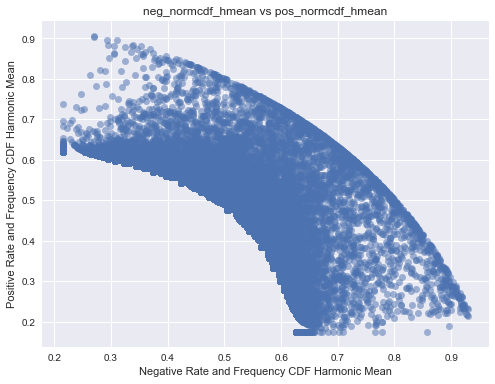

In [64]:
plt.show()